In [4]:
import pandas as pd

In [5]:
my_cols = [x for x in range(0,32)]
df = pd.read_csv('groceries.csv',names=my_cols, engine='python')
df_dummies = pd.get_dummies(df)
#df_dummies

In [6]:
# create new dataframe with union column same item


In [7]:
#df[~df[31].isnull()]
#df_dummies[df_dummies['31_candles']==1]
#df_dummies.add_suffix(columns[0])


In [8]:
import numpy as np
import numpy as np

# search all items
columns = list()
for column in df_dummies.columns:
    for column_1 in df_dummies.columns:
        if(column != column_1 and column.split('_')[1] == column_1.split('_')[1] and column.split('_')[1] not in columns ):
            columns.append(column.split('_')[1])

# remove duplicate
columns = list(set(columns))  
zero_data = np.zeros(shape=(len(df_dummies),len(columns)))
df_new = pd.DataFrame(zero_data, columns=columns,dtype='uint8')
# qualcosa non val alcuni sono valori maggiori di 1
# create a transactional data
for column in df_dummies.columns:
    for column_1 in df_dummies.columns:
        if(column != column_1 and column.split('_')[1] == column_1.split('_')[1]):
            if(column.split('_')[0]=='0'):
                colonna_new  = column.split('_')[1]
                if(len(df_new.index[df_new[colonna_new] > 0].tolist())==0):
                    df_new[colonna_new]=df_new[colonna_new] + df_dummies[column] + df_dummies[column_1]
                else:
                    df_new[colonna_new] = df_new[colonna_new] + df_dummies[column_1]
                #print(df_new[colonna_new])
                    

In [9]:
# ora bisogn aaggiungere len(df) -len(columns) item finti con vlori tutti 0 
# per avere una matrice quadrata (vedi paper)

In [10]:
len(columns)

166

In [11]:
df_new.head(166)

,bottled water,butter milk,cat food,tea,frozen meals,sparkling wine,specialty cheese,flower (seeds),toilet cleaner,white bread,...,mustard,yogurt,dishes,liqueur,house keeping products,newspapers,liver loaf,long life bakery product,dish cleaner,organic products
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df_truncate = df_new.head(166)
from scipy.sparse.csgraph import reverse_cuthill_mckee
from scipy.sparse import csr_matrix
sparse = csr_matrix(df_truncate)
order = reverse_cuthill_mckee(sparse)

In [13]:
order

array([  8, 156, 124, 108,  67,  74, 123,  20,  34,  23,  94,   4, 143,
         3,  98,  26, 120,  70, 109,  91,  36,  48, 130, 164, 132, 162,
        32,  38, 121, 141,  56, 139,  51,  43,  37,  60,  21,  46,  61,
        16,  65,  71,  55, 153, 163,  14,  12,  83,  68,  19, 159,  77,
         2,  22,   9, 112,  81,  24, 158, 146, 140,   7,  75,  63,  47,
       160, 102, 152, 137, 105,   6, 145,  30,  44,  40, 147,  54, 122,
       100,  73, 165,  35, 136,  89, 138, 161, 110,  29,  59, 104,   5,
        96, 142, 131,  99,  11,  39, 144,  72,  92,  53,  41, 119,   1,
        86, 118, 155, 135,  79,  45, 126, 101,  28, 151, 128,  15, 157,
        17, 125, 111,  85,  76, 149,  82,  50,  95,   0, 106,  57, 114,
        88,  42, 133,  90, 127,  69,  10, 150,  27,  80,  18,  33,  49,
       107, 115,  58,  87,  84, 113, 117,  78,  97, 148, 116,  31,  62,
        52, 154, 103,  25,  64, 134,  13,  66,  93, 129], dtype=int32)

In [14]:
df_truncate.iloc[order]

,bottled water,butter milk,cat food,tea,frozen meals,sparkling wine,specialty cheese,flower (seeds),toilet cleaner,white bread,...,mustard,yogurt,dishes,liqueur,house keeping products,newspapers,liver loaf,long life bakery product,dish cleaner,organic products
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
124,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
108,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
74,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
123,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


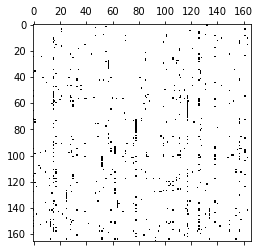

In [18]:
import matplotlib.pylab as plt
import scipy.sparse as sps
#M = sps.csr_matrix(df_truncate.iloc[order])
new_df = df_truncate.iloc[order]
plt.spy(new_df)
plt.show()

In [17]:
df_truncate.to_csv("data.csv",header=False,index=False)

In [34]:
# aggiungiamo item fittizi per avere una matrice quadrata
zero_data_to_add = np.zeros(shape=(len(df_dummies),len(df_dummies)-len(columns)))
columns_to_add = [x for x in range(0,len(df_dummies)-len(columns))] 
df_to_add = pd.DataFrame(zero_data_to_add, columns=columns_to_add,dtype='uint8')
df_new_complete = df_new + df_to_add


9669

In [ ]:
df_new_complete.to_csv("data_complete.csv",header=False,index=False)

9835